Summary statitics\
Here i analize the most important columns of the datasets of the last 5 years


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import  matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math

In [2]:
df_acc_5=pd.read_csv('file:///Users/davidelibera/Desktop/Projects%20/project%20data%20science/dft-road-casualty-statistics-accident-last-5-years.csv',low_memory=False)
df_veh_5=pd.read_csv('file:///Users/davidelibera/Desktop/Projects%20/project%20data%20science/dft-road-casualty-statistics-vehicle-last-5-years.csv',low_memory=False)
df_cas_5=pd.read_csv('file:///Users/davidelibera/Desktop/Projects%20/project%20data%20science/dft-road-casualty-statistics-casualty-last-5-years.csv',low_memory=False)

In [57]:
df_acc_5.keys()

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

Let's create smaller datasets with the most important columns

In [3]:
df_acc_5sm=df_acc_5[['number_of_casualties','speed_limit','number_of_vehicles','road_type','accident_severity','weather_conditions','junction_detail']]
df_veh_5sm=df_veh_5[['vehicle_type','vehicle_manoeuvre','age_of_driver','sex_of_driver']]
df_cas_5sm=df_cas_5[['pedestrian_location','pedestrian_movement','car_passenger','casualty_class','casualty_severity','age_of_casualty']]

We create smaller datasets with only fatal accidents

In [4]:
df_acc_5sm_fatal = df_acc_5sm[df_acc_5sm['accident_severity']==1]
df_cas_5sm_fatal= df_cas_5sm[df_cas_5sm['casualty_severity']==1]

Let's create a list with the age of the drivers and delete the value -1 which is useless for statistics

In [18]:
age_of_driver = df_veh_5sm['age_of_driver'].values.tolist()
age_of_driverMV=age_of_driver.count(-1)
age_of_driver= [x for x in age_of_driver if x != -1]

In [19]:
age_of_driver_fatal= df_cas_5sm_fatal['age_of_casualty'].values.tolist() #the same with the values of fatal accidents
#age_of_driverMV=age_of_driver.count(-1)
age_of_driver_fatal= [x for x in age_of_driver_fatal if x != -1]

Let's plot a kernel density estimate of age distribution

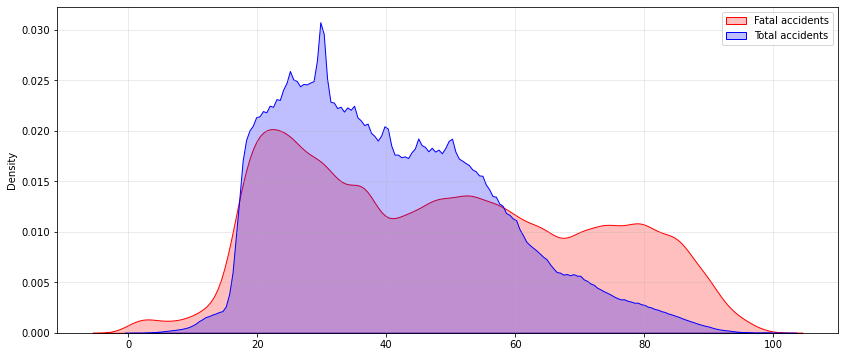

In [20]:
plt.figure(figsize=(14,6))
fig=sns.kdeplot(age_of_driver_fatal,color='red',shade=True, bw_adjust=.5,label='Fatal accidents')
fig=sns.kdeplot(age_of_driver,color='blue',shade=True,bw_adjust=.5,label='Total accidents')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Now let's define a function to print all the main statistics

In [21]:
def statistics(variable):
    stats={}
    stats['mean']=stat.mean(variable)
    stats['mode']=stat.mode(variable)
    stats['median']=stat.median(variable)
    stats['std_dev']=stat.stdev(variable)
    stats['variance']=stat.variance(variable)
    return stats
    


In [22]:
print(statistics(age_of_driver))
print(statistics(age_of_driver_fatal))


{'mean': 40.53983391580232, 'mode': 30, 'median': 38, 'std_dev': 16.37182076416926, 'variance': 268.0365151340838}
{'mean': 47.68531468531469, 'mode': 21, 'median': 46.0, 'std_dev': 22.520525534803124, 'variance': 507.1740703637195}


Let's now focus on number of casualties and of vehicles involved in the accidents

In [23]:
number_of_casualties= df_acc_5sm['number_of_casualties'].values.tolist()
number_of_vehicles = df_acc_5sm['number_of_vehicles'].values.tolist()



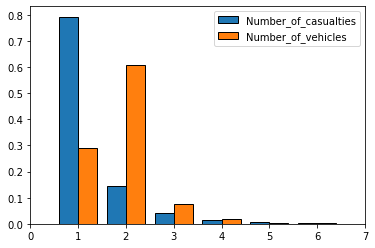

In [25]:
plt.hist([number_of_casualties,number_of_vehicles],bins=np.arange(100)-0.5,label=('Number_of_casualties','Number_of_vehicles'),edgecolor='black',density=True)
plt.xlim(0,7)
plt.legend()
plt.show()

Printing the main statistics

In [26]:
print(statistics(number_of_vehicles))
print(statistics(number_of_casualties))

{'mean': 1.8422085947024365, 'mode': 2, 'median': 2, 'std_dev': 0.7099327586979698, 'variance': 0.5040045218725098}
{'mean': 1.3072764154903316, 'mode': 1, 'median': 1, 'std_dev': 0.7564937752241814, 'variance': 0.5722828319529343}


Now analizing the accindent severity, to have a better visualization we define a binary list with fatal and non-fatal accidents

In [27]:
accident_severity= df_acc_5sm['accident_severity'].values.tolist()
for i in range(0,len(accident_severity)):
    if accident_severity[i]==3:
        accident_severity[i]=1
    else:
        accident_severity[i]=0

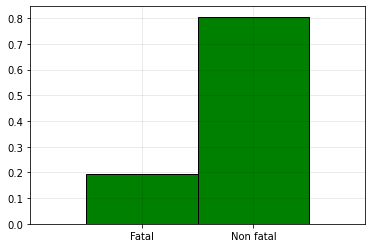

In [28]:
plt.hist(accident_severity,bins=np.arange(100)-0.5,edgecolor='black',color='green',density=True)
plt.xlim(-1,2)
plt.grid(color='black',alpha=0.1)
plt.xticks(ticks=(0,1),labels=('Fatal','Non fatal'))
plt.show()


Which are the manoeuvres that most conduct to accidents,first we remove the useless values(-1,99)

In [29]:
vehicle_manoeuvre = df_veh_5sm['vehicle_manoeuvre'].values.tolist()
#vehicle_manoeuvreMv=vehicle_manoeuvre.count(-1)
vehicle_manoeuvre= [x for x in vehicle_manoeuvre if x != -1]
vehicle_manoeuvre= [x for x in vehicle_manoeuvre if x != 99]

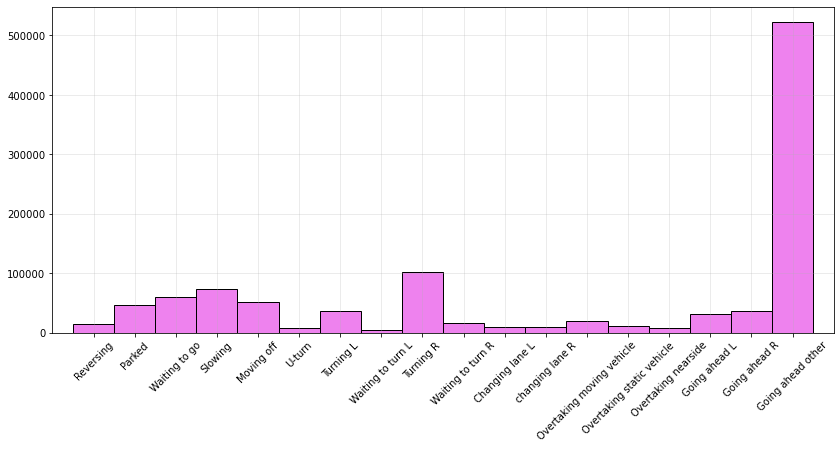

In [30]:
manoeuvres=('Reversing','Parked','Waiting to go','Slowing','Moving off','U-turn',\
            'Turning L','Waiting to turn L','Turning R','Waiting to turn R',\
            'Changing lane L','changing lane R','Overtaking moving vehicle',\
            'Overtaking static vehicle','Overtaking nearside','Going ahead L','Going ahead R','Going ahead other')

plt.figure(figsize=(14,6))
plt.hist(vehicle_manoeuvre,bins=np.arange(50)-0.5,color='violet',edgecolor='black')
plt.xlim(0,19)
plt.grid(alpha=0.3)
plt.xticks(ticks=range(1,19,1),labels=manoeuvres,rotation='45')
plt.show()

Now we analize the vehicle type, before plotting i rescaled with 2 for cycles to have only 6 types of vehicles

In [31]:
vehicle_type = df_veh_5sm['vehicle_type'].values.tolist()

In [32]:
vehicle_type= [x for x in vehicle_type if x != -1]
vehicle_type= [x for x in vehicle_type if x != 99]
for i in range(0,len(vehicle_type)):
    if vehicle_type[i]==3 or vehicle_type[i]==4 or vehicle_type[i]==5 or vehicle_type[i]==97 or vehicle_type[i]==22 or vehicle_type[i]==23:
        vehicle_type[i]=2
    elif vehicle_type[i]==98 or vehicle_type[i]==21 or vehicle_type[i]==19:
        vehicle_type[i]=20
    elif vehicle_type[i]==90 or vehicle_type[i]==18 or vehicle_type[i]==17:
        vehicle_type[i]=16
    elif vehicle_type[i]==11:
        vehicle_type[i]=10
    elif vehicle_type[i]==9:
        vehicle_type[i]=8

In [33]:
vehicle_typenew= vehicle_type.copy()
np.unique(vehicle_typenew)

array([ 1,  2,  8, 10, 16, 20])

In [34]:
for j in range(0,len(vehicle_typenew)):
    if vehicle_typenew[j]==8:
        vehicle_typenew[j]=3
    elif vehicle_typenew[j]==10:
        vehicle_typenew[j]=4
    elif vehicle_typenew[j]==16:
        vehicle_typenew[j]=5
    elif vehicle_typenew[j]==20:
        vehicle_typenew[j]=6 

In [35]:
np.unique(vehicle_typenew)

array([1, 2, 3, 4, 5, 6])

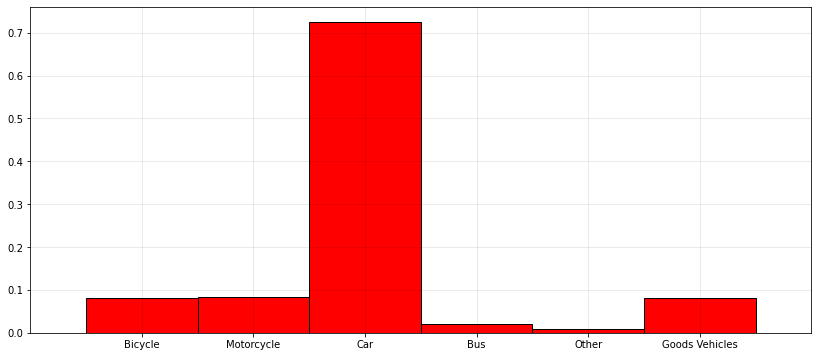

In [37]:
types=('Bicycle','Motorcycle','Car','Bus','Other','Goods Vehicles')
plt.figure(figsize=(14,6))
plt.hist(vehicle_typenew,bins=np.arange(100)-0.5,color='red',edgecolor='black',density=True)
plt.xlim(0,7)
plt.grid(color='black',alpha=0.1)
plt.xticks(ticks=(1,2,3,4,5,6),labels=types)
#plt.yscale('log')
plt.show()

Now we take into account the different types of junctions

In [38]:
junction_detail= df_acc_5sm['junction_detail'].values.tolist() #removing useless values 
junction_detail_fatal=df_acc_5sm_fatal['junction_detail'].values.tolist()
junction_detail= [x for x in junction_detail if x != -1] 
junction_detail= [x for x in junction_detail if x != 99]
junction_detail= [x for x in junction_detail if x != 0]
junction_detail_fatal= [x for x in junction_detail_fatal if x != 0]


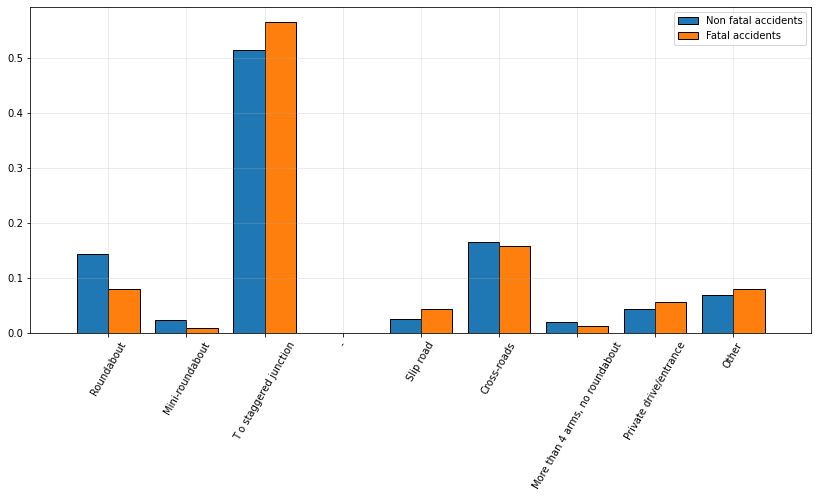

In [40]:
plt.figure(figsize=(14,6))
junctions=('Roundabout','Mini-roundabout','T o staggered junction','-',\
           'Slip road','Cross-roads','More than 4 arms, no roundabout','Private drive/entrance','Other')
plt.hist([junction_detail,junction_detail_fatal],bins=np.arange(20)-0.5,label=('Non fatal accidents','Fatal accidents'),density=True,edgecolor='black')
plt.xlim(0,10)
plt.xticks(ticks=range(1,10,1),labels=junctions,rotation='60')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Let's now analize some statistics about pedestrians, here we exclude the value 0 and -1

In [41]:
pedestrian_location = df_cas_5sm['pedestrian_location'].values.tolist()
pedestrian_locationMV=pedestrian_location.count(-1)
pedestrian_locationMV

12

In [42]:
pedestrian_location= [x for x in pedestrian_location if x != -1] 
pedestrian_location= [x for x in pedestrian_location if x != 99]
pedestrian_location= [x for x in pedestrian_location if x != 0]


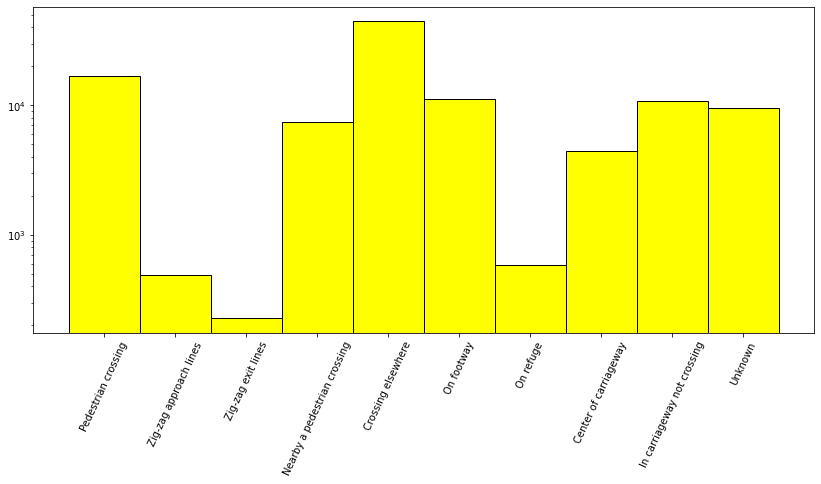

In [43]:
locations=('Pedestrian crossing','Zig-zag approach lines','Zig-zag exit lines'\
           ,'Nearby a pedestrian crossing'\
           ,'Crossing elsewhere','On footway','On refuge','Center of carriageway','In carriageway not crossing','Unknown')
plt.figure(figsize=(14,6))
plt.hist(pedestrian_location,bins=np.arange(20)-0.5,color='yellow',edgecolor='black')
plt.yscale('log')
plt.xticks(ticks=range(1,11,1),labels=locations,rotation=65)
plt.xlim(0,11)
plt.show()

In [44]:
pedestrian_movement = df_cas_5sm['pedestrian_movement'].values.tolist()
pedestrian_movementMV=pedestrian_movement.count(0)
pedestrian_movementMV

675404

In [45]:
pedestrian_movement= [x for x in pedestrian_movement if x != -1] 
pedestrian_movement= [x for x in pedestrian_movement if x != 99]
pedestrian_movement= [x for x in pedestrian_movement if x != 0]

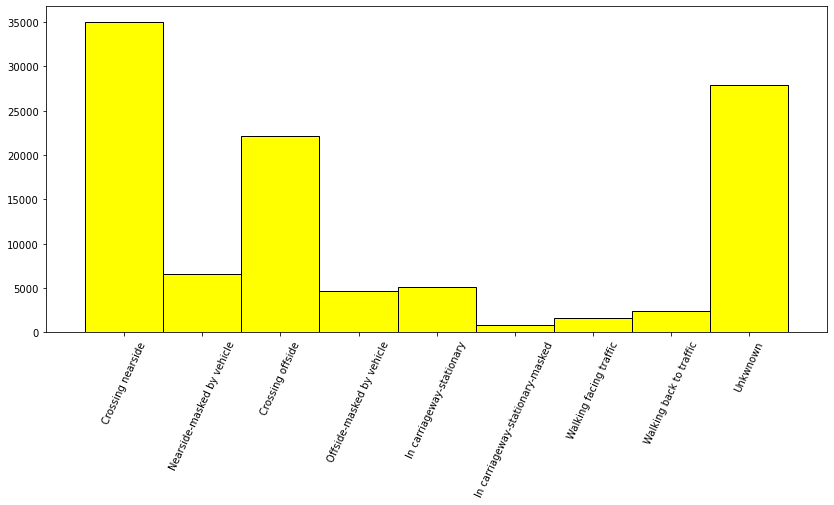

In [46]:
movements=('Crossing nearside','Nearside-masked by vehicle','Crossing offside','Offside-masked by vehicle'\
           ,'In carriageway-stationary','In carriageway-stationary-masked',\
           'Walking facing traffic','Walking back to traffic','Unkwnown')
plt.figure(figsize=(14,6))
plt.hist(pedestrian_movement,bins=np.arange(20)-0.5,color='yellow',edgecolor='black')
plt.xticks(ticks=range(1,10,1),labels=(movements),rotation=65)
plt.xlim(0,10)
plt.show()

Let's now analize the speed limit, both for the total accidents and only for the fatal ones 

In [47]:
MV_speed_limit = np.isnan(df_acc_5sm.speed_limit) #check for missing values in both datasets
MVn_speed_limit = np.unique(MV_speed_limit, return_counts=True)
print(MVn_speed_limit)
MV_speed_limit = np.isnan(df_acc_5sm_fatal.speed_limit)
MVn_speed_limit = np.unique(MV_speed_limit, return_counts=True)
print(MVn_speed_limit)

(array([False,  True]), array([597936,     37]))
(array([False]), array([8091]))


In [48]:
df_acc_5sm=df_acc_5sm['speed_limit'].dropna() #removing the missing values

In [50]:
speed_limit= df_acc_5sm.values.tolist()
speed_limit_fatal = df_acc_5sm_fatal['speed_limit'].values.tolist()

In [51]:
speed_limit1=[]  #modify the list to represent them better in an histogram
for number in speed_limit:
    speed_limit1.append(number / 10)

speed_limit_fatal1=[]
for number in speed_limit_fatal:
    speed_limit_fatal1.append(number/10)

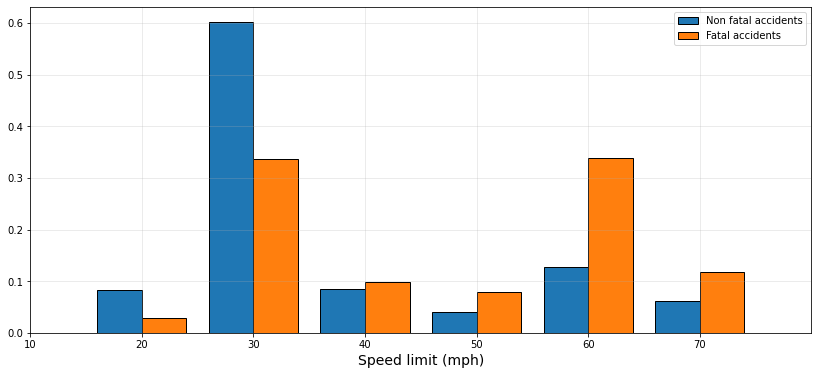

In [70]:
plt.figure(figsize=(14,6))
plt.hist([speed_limit1,speed_limit_fatal1],bins=np.arange(20)-0.5,label=('Non fatal accidents','Fatal accidents'),density=True,edgecolor='black')
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(2,8)
plt.xticks(ticks=range(1,8,1),labels=range(10,80,10))
plt.xlabel('Speed limit (mph)',size=14)
plt.show()

In [7]:
weather_conditions= df_acc_5sm['weather_conditions'].values.tolist() #removing useless values 
weather_conditions_fatal=df_acc_5sm_fatal['weather_conditions'].values.tolist()
weather_conditions= [x for x in weather_conditions if x != -1] 
weather_conditions= [x for x in weather_conditions if x != 9]
weather_conditions_fatal= [x for x in weather_conditions_fatal if x != -1]
weather_conditions_fatal= [x for x in weather_conditions_fatal if x != 9]
t=np.unique(weather_conditions)
t

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
weather_conditions= [x for x in weather_conditions if x != 1] #we remove also the value 1, to analize the conditions with bad weather
weather_conditions_fatal= [x for x in weather_conditions_fatal if x != 1]


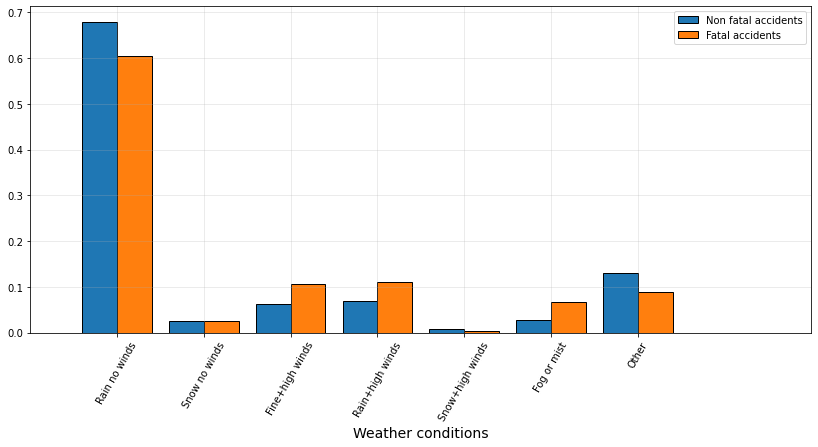

In [67]:
weather=('Rain no winds','Snow no winds','Fine+high winds',\
        'Rain+high winds','Snow+high winds','Fog or mist','Other')
plt.figure(figsize=(14,6))
plt.hist([weather_conditions,weather_conditions_fatal],bins=np.arange(20)-0.5,density=True,edgecolor='black',label=('Non fatal accidents','Fatal accidents'))
plt.xlim(1,10)
plt.xticks(ticks=range(2,9,1),labels=weather,rotation='60')
plt.grid(alpha=0.3)
plt.legend()
plt.xlabel('Weather conditions',size=14)
plt.show()